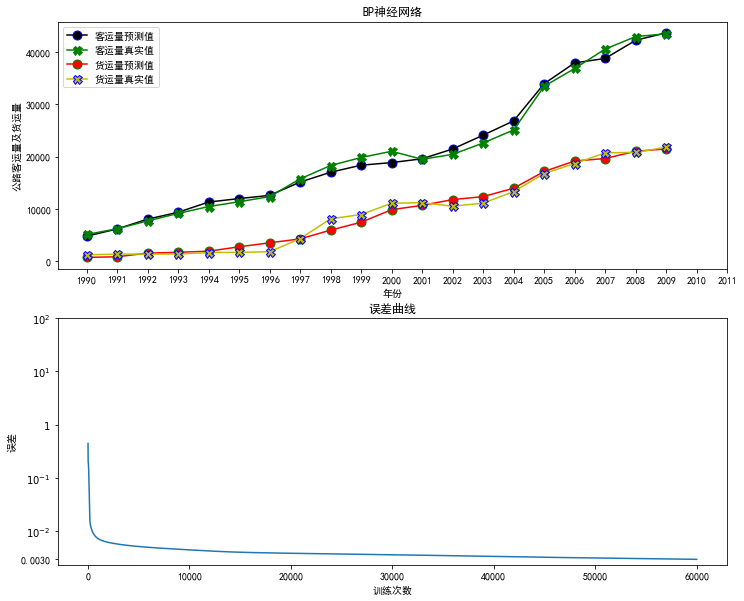

2010年预测的公路客运量为： 62258 (万人)
2010年预测的公路货运量为： 26918 (万吨)
2011年预测的公路客运量为： 65422 (万人)
2011年预测的公路货运量为： 27472 (万吨)


In [4]:
#!/usr/bin/python
# coding=utf-8
from numpy import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import time
import xlrd
import sys
from pylab import *



importlib.reload(sys)
matplotlib.rcParams['font.sans-serif']=['Droid Sans Fallback']
 
def read_xls_file(filename):                         #读取训练数据  
    data = xlrd.open_workbook(filename)                
    sheet1 = data.sheet_by_index(0)                    
    m = sheet1.nrows                                    
    n = sheet1.ncols                                    
    pop = []                         
    veh = []
    roa = []        
    pas = []
    fre = []
    for i in range(m):                                  
        row_data = sheet1.row_values(i)               
        if i > 0:
           pop.append(row_data[1])
           veh.append(row_data[2])
           roa.append(row_data[3])
           pas.append(row_data[4])
           fre.append(row_data[5])

    dataMat = np.mat([pop,veh,roa])
    labels = np.mat([pas,fre])
    dataMat_old = dataMat
    labels_old = labels
    return dataMat,labels,dataMat_old,labels_old

def read_xls_testfile(filename):                           #读取测试数据
    data = xlrd.open_workbook(filename) 
    sheet1 = data.sheet_by_index(0)            
    m = sheet1.nrows                           
    n = sheet1.ncols                                    
    pop = []                         
    veh = []
    roa = []        
    for i in range(m):                       
        row_data = sheet1.row_values(i)       
        if i > 0:
           pop.append(row_data[1])
           veh.append(row_data[2])
           roa.append(row_data[3])

    dataMat = np.mat([pop,veh,roa])
    return dataMat

def Norm(dataMat,labels):                                  #归一化数据
    dataMat_minmax = np.array([dataMat.min(axis=1).T.tolist()[0],dataMat.max(axis=1).T.tolist()[0]]).transpose() 
    dataMat_Norm = ((np.array(dataMat.T)-dataMat_minmax.transpose()[0])/
                    (dataMat_minmax.transpose()[1]-dataMat_minmax.transpose()[0])).transpose()
    labels_minmax  = np.array([labels.min(axis=1).T.tolist()[0],labels.max(axis=1).T.tolist()[0]]).transpose()
    labels_Norm = ((np.array(labels.T).astype(float)-labels_minmax.transpose()[0])/
                   (labels_minmax.transpose()[1]-labels_minmax.transpose()[0])).transpose()
    return dataMat_Norm,labels_Norm,dataMat_minmax,labels_minmax

def f(x):                                                  #激励函数
    return 1/(1+np.exp(-x))
    #return (np.exp(x)- np.exp(-x))/(np.exp(x)+np.exp(-x))

def BP(sampleinnorm, sampleoutnorm):                       #BP算法
    maxepochs = 60000   #训练次数
    learnrate = 0.030   #学习率
    errorfinal = 0.65*10**(-3) #误差
    samnum = 20        #样本数目
    indim = 3          #输入层神经元个数
    outdim = 2         #输出层神经元个数
    hiddenunitnum = 3  #隐含层神经元个数
    n,m = shape(sampleinnorm)#随机产生权重和偏置
    w1 = 0.5*np.random.rand(hiddenunitnum,indim)-0.1
    b1 = 0.5*np.random.rand(hiddenunitnum,1)-0.1
    w2 = 0.5*np.random.rand(outdim,hiddenunitnum)-0.1
    b2 = 0.5*np.random.rand(outdim,1)-0.1

    errhistory = []

    for i in range(maxepochs):
        hiddenout = f((np.dot(w1,sampleinnorm).transpose()+b1.transpose())).transpose()#隐藏层输出
        networkout = (np.dot(w2,hiddenout).transpose()+b2.transpose()).transpose()#输出层输出
        err = sampleoutnorm - networkout
        sse = sum(sum(err**2))/m
        errhistory.append(sse)
        if sse < errorfinal:
          break
        
        delta2 = err
        delta1 = np.dot(w2.transpose(),delta2)*hiddenout*(1-hiddenout)
        dw2 = np.dot(delta2,hiddenout.transpose())
        db2 = np.dot(delta2,np.ones((samnum,1)))
        dw1 = np.dot(delta1,sampleinnorm.transpose())
        db1 = np.dot(delta1,np.ones((samnum,1)))
        w2 += learnrate*dw2
        b2 += learnrate*db2
        w1 += learnrate*dw1
        b1 += learnrate*db1

    return errhistory,b1,b2,w1,w2,maxepochs


def show(sampleinnorm,sampleoutminmax,sampleout,errhistory,maxepochs):   #图形显示
    hiddenout = f((np.dot(w1,sampleinnorm).transpose()+b1.transpose())).transpose()
    networkout = (np.dot(w2,hiddenout).transpose()+b2.transpose()).transpose()
    diff = sampleoutminmax[:,1]-sampleoutminmax[:,0]
    networkout2 = networkout
    networkout2[0] = networkout2[0]*diff[0]+sampleoutminmax[0][0]
    networkout2[1] = networkout2[1]*diff[1]+sampleoutminmax[1][0]
    sampleout = np.array(sampleout)

    
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(12,10))
    line1, = axes[0].plot(networkout2[0],'k',markeredgecolor='b',marker = 'o',markersize=9)
    line2, = axes[0].plot(sampleout[0],'g',markeredgecolor='g',marker = 'X',markersize=9)
    line3, = axes[0].plot(networkout2[1],'r',markeredgecolor='g',marker = 'o',markersize=9)
    line4, = axes[0].plot(sampleout[1],'y',markeredgecolor='b',marker = 'X',markersize=9)
    axes[0].legend((line1,line2,line3,line4),(u'客运量预测值',u'客运量真实值',u'货运量预测值',u'货运量真实值'),loc = 'upper left')
    axes[0].set_ylabel(u'公路客运量及货运量')
    xticks = range(0,22,1)
    xtickslabel = range(1990,2012,1)
    axes[0].set_xticks(xticks)
    axes[0].set_xticklabels(xtickslabel)
    axes[0].set_xlabel(u'年份')
    axes[0].set_title(u'BP神经网络')

    errhistory10 = np.log10(errhistory)
    minerr = min(errhistory10)
    plt.plot(errhistory10)
    axes[1]=plt.gca()
    axes[1].set_yticks([-2,-1,0,1,2,minerr])
    axes[1].set_yticklabels([u'$10^{-2}$',u'$10^{-1}$',u'$1$',u'$10^{1}$',u'$10^{2}$',str(('%.4f'%np.power(10,minerr)))])
    axes[1].set_xlabel(u'训练次数')
    axes[1].set_ylabel(u'误差')
    axes[1].set_title(u'误差曲线')

    plt.show()
    plt.close()
    
    return diff, sampleoutminmax

def pre(dataMat,dataMat_minmax,diff,sampleoutminmax,w1,b1,w2,b2):          #数值预测
    dataMat_test = ((np.array(dataMat.T)-dataMat_minmax.transpose()[0])/
                    (dataMat_minmax.transpose()[1]-dataMat_minmax.transpose()[0])).transpose() 
    hiddenout = f((np.dot(w1,dataMat_test).transpose()+b1.transpose())).transpose()
    networkout1 = (np.dot(w2,hiddenout).transpose()+b2.transpose()).transpose()
    networkout = networkout1
    networkout[0] = networkout[0]*diff[0] + sampleoutminmax[0][0]
    networkout[1] = networkout[1]*diff[1] + sampleoutminmax[1][0]

    print ("2010年预测的公路客运量为：", int(networkout[0][0]),"(万人)")
    print ("2010年预测的公路货运量为：", int(networkout[1][0]),"(万吨)")
    print ("2011年预测的公路客运量为：", int(networkout[0][1]),"(万人)")
    print ("2011年预测的公路货运量为：", int(networkout[1][1]),"(万吨)")

dataMat,labels,dataMat_old,labels_old = read_xls_file('data.xlsx')
dataMat_Norm,labels_Norm, dataMat_minmax, labels_minmax = Norm(dataMat,labels)


err, b1, b2, w1, w2,maxepochs = BP(dataMat_Norm,labels_Norm)
dataMat_test = read_xls_testfile('data_test.xlsx')
diff, sampleoutminmax = show(dataMat_Norm,labels_minmax,labels,err,maxepochs)
pre(dataMat_test,dataMat_minmax,diff, sampleoutminmax ,w1,b1,w2,b2)


2010年预测的公路客运量为：54239 (万人)
2010年预测的公路货运量为：29159 (万吨)
2011年预测的公路客运量为：56360 (万人)
2011年预测的公路货运量为：30424 (万吨)


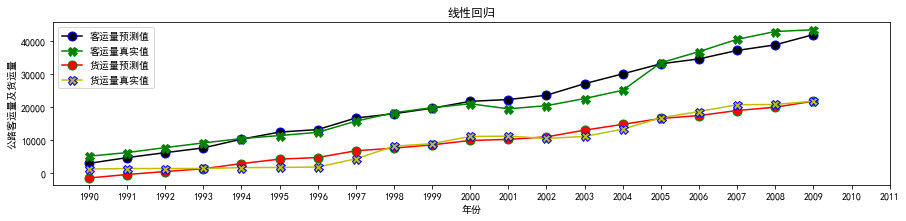

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

def LoadFile(filename):
    data = np.loadtxt(filename, delimiter=',', unpack=True, usecols=(0, 1, 2, 3, 4, 5))
    x1 = np.transpose(np.array(data[1]))
    x2 = np.transpose(np.array(data[2]))
    x3 = np.transpose(np.array(data[3]))
    y1 = np.transpose(np.array(data[4]))
    y2 = np.transpose(np.array(data[5]))
    return x1, x2, x3, y1, y2

if __name__ == '__main__':
    x1, x2, x3, y1, y2 = LoadFile('data.txt')
    num=len(x1) #样本数量
    xx0=np.ones(num)
    #归一化处理，这里使用线性归一化
    xx1=(x1-x1.min())/(x1.max()-x1.min())
    xx2=(x2-x2.min())/(x2.max()-x2.min())
    xx3=(x3-x3.min())/(x3.max()-x3.min())
    #堆叠属性数组，构造属性矩阵
    #从(16,)到(16,3),因为新出现的轴是第二个轴所以axis为1
    X=np.stack((xx0,xx1,xx2,xx3),axis=1)
    #得到形状为一列的数组
    Y1=y1.reshape(-1,1)
    Y2=y2.reshape(-1,1)
    learn_rate=0.001    #设置超参数
    iter=1500   #迭代次数
    display_step=50    #每50次迭代显示一下效果
    
    #设置模型参数初始值
    W1=[[0],
       [0],
       [0],
       [0]]
    W2=[[0],
       [0],
       [0],
       [0]]
    #训练模型
    mse=[]
    for i in range(0,iter+1):
        #求偏导
        dL_dW1=np.matmul(np.transpose(X),np.matmul(X,W1)-Y1)   #XT(XW-Y)
        #更新模型参数
        W1=W1-learn_rate*dL_dW1
        #得到估计值
        PRED1=np.matmul(X,W1)
        #计算损失(均方误差)
        Loss1=np.mean(np.square(Y1-PRED1))/2
        mse.append(Loss1)
        dL_dW2=np.matmul(np.transpose(X),np.matmul(X,W2)-Y2)   #XT(XW-Y)
        W2=W2-learn_rate*dL_dW2
        PRED2=np.matmul(X,W2)
        Loss2=np.mean(np.square(Y2-PRED2))/2
        mse.append(Loss2)
    xxx0=np.ones(1)
    xxx1=(73.39-x1.min())/(x1.max()-x1.min())
    xxx2=(3.9635-x2.min())/(x2.max()-x2.min())
    xxx3=(0.988-x3.min())/(x3.max()-x3.min())
    XXX=[1,xxx1,xxx2,xxx3]
    print("2010年预测的公路客运量为：%d"%np.round(np.matmul(XXX,W1)),"(万人)")   
    print("2010年预测的公路货运量为：%d"%np.round(np.matmul(XXX,W2)),"(万吨)") 
    xxx0=np.ones(1)
    xxx1=(75.55-x1.min())/(x1.max()-x1.min())
    xxx2=(4.0975-x2.min())/(x2.max()-x2.min())
    xxx3=(1.0268-x3.min())/(x3.max()-x3.min())
    XXX=[1,xxx1,xxx2,xxx3]
    print("2011年预测的公路客运量为：%d"%np.round(np.matmul(XXX,W1)),"(万人)") 
    print("2011年预测的公路货运量为：%d"%np.round(np.matmul(XXX,W2)),"(万吨)")
    
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,3))
    line1, = axes.plot(PRED1,'k',markeredgecolor='b',marker = 'o',markersize=9)
    line2, = axes.plot(y1,'g',markeredgecolor='g',marker = 'X',markersize=9)
    line3, = axes.plot(PRED2,'r',markeredgecolor='g',marker = 'o',markersize=9)
    line4, = axes.plot(y2,'y',markeredgecolor='b',marker = 'X',markersize=9)
    axes.legend((line1,line2,line3,line4),(u'客运量预测值',u'客运量真实值',u'货运量预测值',u'货运量真实值'),loc = 'upper left')
    axes.set_ylabel(u'公路客运量及货运量')
    xticks = range(0,22,1)
    xtickslabel = range(1990,2012,1)
    axes.set_xticks(xticks)
    axes.set_xticklabels(xtickslabel)
    axes.set_xlabel(u'年份')
    axes.set_title(u'线性回归')
    plt.show()
    
